Read Data

In [1]:
import pandas as pd
df = pd.read_csv('Smoking Data.csv')

In [2]:
df.head()

,region,age,sex,bmi,children,smoker
0,southwest,19,female,27.900,0,yes
1,southeast,18,male,33.770,1,no
2,southeast,28,male,33.000,3,no
3,northwest,33,male,22.705,0,no
4,northwest,32,male,28.880,0,no


Separating Target & Features

In [3]:
x = df.drop('smoker',axis=1)
y = df['smoker']

In [4]:
x.head()

,region,age,sex,bmi,children
0,southwest,19,female,27.900,0
1,southeast,18,male,33.770,1
2,southeast,28,male,33.000,3
3,northwest,33,male,22.705,0
4,northwest,32,male,28.880,0


In [5]:
y.head()

0    yes
1     no
2     no
3     no
4     no
Name: smoker, dtype: object

Convert Categorical Data to Numerical Data

In [6]:
from pandas.core.dtypes.common import is_numeric_dtype
from sklearn.preprocessing import LabelEncoder
for col in x.columns:
    if is_numeric_dtype(x[col]):
        continue
    else:
        le = LabelEncoder()
        x[col] = le.fit_transform(x[col])

In [7]:
x.head()

,region,age,sex,bmi,children
0,3,19,0,27.900,0
1,2,18,1,33.770,1
2,2,28,1,33.000,3
3,1,33,1,22.705,0
4,1,32,1,28.880,0


Spliting the Data as 70:30 ratio

In [8]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=.30,random_state=42)

# Decision Tree Classifier

In [9]:
from sklearn.tree import DecisionTreeClassifier
clf = DecisionTreeClassifier()

Fitting the Model

In [10]:
clf.fit(x_train,y_train)

DecisionTreeClassifier()

Testing the model

In [16]:
pred = clf.predict(x_test)
pred

array(['no', 'no', 'no', 'no', 'no', 'no', 'yes', 'no', 'yes', 'no',
       'yes', 'no', 'no', 'yes', 'yes', 'no', 'yes', 'no', 'no', 'yes',
       'no', 'yes', 'no', 'no', 'no', 'no', 'no', 'no', 'no', 'yes', 'no',
       'no', 'no', 'yes', 'no', 'no', 'no', 'no', 'no', 'no', 'no', 'no',
       'no', 'no', 'yes', 'no', 'yes', 'yes', 'no', 'yes', 'no', 'yes',
       'no', 'no', 'no', 'yes', 'no', 'no', 'no', 'no', 'no', 'no', 'yes',
       'yes', 'no', 'no', 'no', 'no', 'no', 'no', 'no', 'no', 'yes', 'no',
       'yes', 'yes', 'no', 'no', 'no', 'yes', 'no', 'yes', 'no', 'no',
       'no', 'yes', 'yes', 'no', 'no', 'no', 'no', 'yes', 'no', 'yes',
       'yes', 'no', 'no', 'no', 'yes', 'no', 'yes', 'no', 'no', 'no',
       'no', 'no', 'no', 'no', 'yes', 'no', 'no', 'no', 'no', 'no', 'no',
       'no', 'no', 'no', 'no', 'no', 'no', 'no', 'no', 'no', 'no', 'no',
       'no', 'no', 'no', 'yes', 'no', 'no', 'no', 'no', 'yes', 'no',
       'yes', 'yes', 'yes', 'yes', 'no', 'no', 'no', 'no', '

In [20]:
df_pred = pd.DataFrame(pred, columns=['predicted_smoker'])
df_pred.head()

,predicted_smoker
0,no
1,no
2,no
3,no
4,no


Evaluating the performance

In [21]:
clf.score(x_test,y_test)

0.6766169154228856

In [22]:
from sklearn import tree
import matplotlib.pyplot as plt

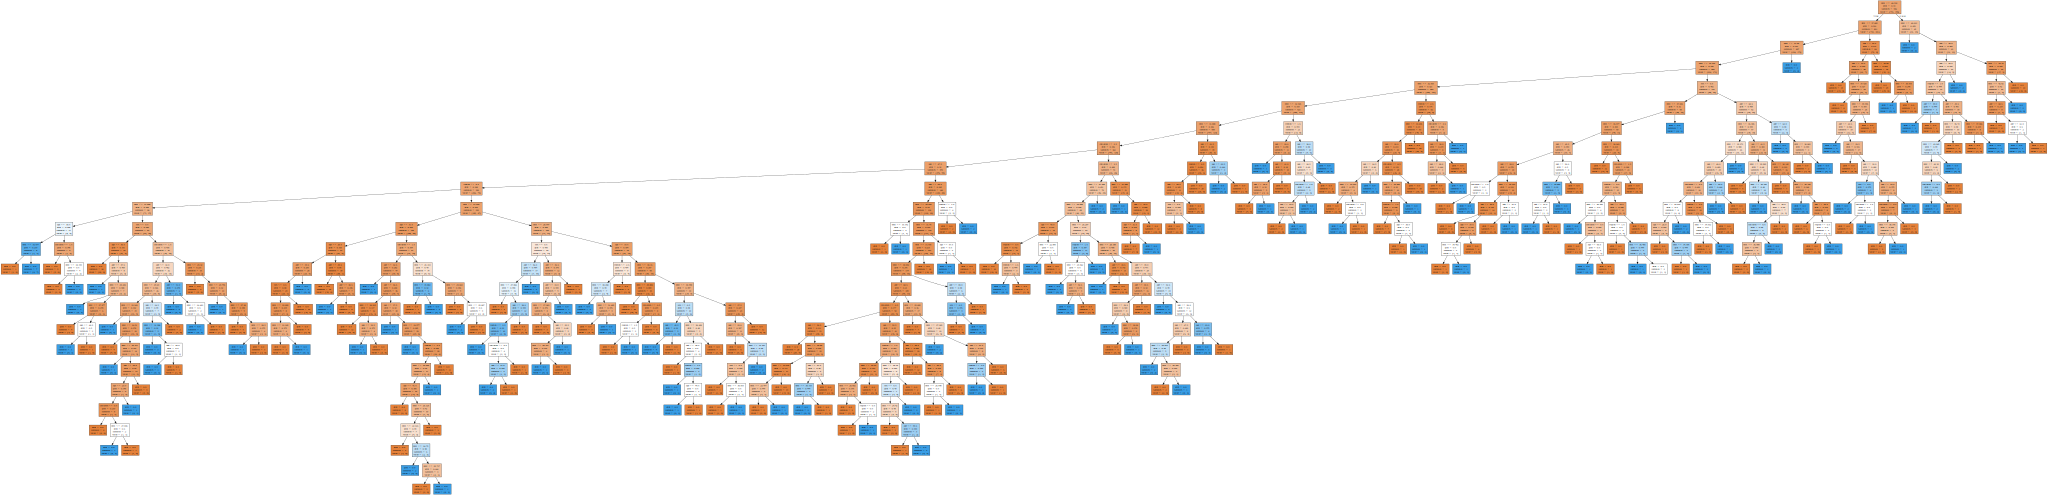

In [32]:
import graphviz
dot_data = tree.export_graphviz(clf, out_file=None, 
                                feature_names=x.columns,
                                filled=True)

# Draw graph
graph = graphviz.Source(dot_data, format="png") 
graph

In [33]:
graph.render("decision_tree_graphivz")

'decision_tree_graphivz.png'